In [2]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    compress_repeated_epochs,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.place_cells import place_cells_run, fields, place_cell_plots, maps
import statistics
import nelpy as nel
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import pickle
import glob
from matplotlib.ticker import AutoMinorLocator

functions.set_plotting_defaults()

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
basepath = "Z:\\Data\\Kenji\\ec013.393_418"

# get spikes
st,cm = loading.load_spikes(basepath)

# get position
position_df = loading.load_animal_behavior(basepath)
position_df_no_nan = position_df.query("not x.isnull() & not y.isnull()")
pos = nel.PositionArray(data=np.array([position_df_no_nan[["x","y"]]]).T,timestamps=position_df_no_nan.time.values)

# load epochs
epoch_df = loading.load_epoch(basepath)
epochs = nel.EpochArray(np.array([epoch_df.startTime,epoch_df.stopTime]).T)

In [17]:
epoch_df.query("environment != 'sleep'")

,name,startTime,stopTime,environment,behavioralParadigm
2,ec013.395_linear,4352.1960,5500.8960,linear,10
8,ec013.402_wheel,10128.4314,10563.8362,wheel,10
9,ec013.403_wheel,10563.8362,11627.5672,wheel,10
10,ec013.404_wheel,11627.5672,12634.3642,wheel,10
11,ec013.405_bigSquare,12634.3642,12789.1930,bigSquare,10
12,ec013.406_bigSquare,12789.1930,14468.9630,bigSquare,10
14,ec013.410_bigSquare,14784.7646,16269.1546,bigSquare,10
15,ec013.411_bigSquare,16269.1546,17168.5546,bigSquare,10
16,ec013.412_linear,17168.5546,18038.1354,linear,10
17,ec013.413_linear,18038.1354,18673.4250,linear,10


In [15]:
epochs

<EpochArray at 0x19330f38880: 23 epochs> of length 6:37:48:840 hours

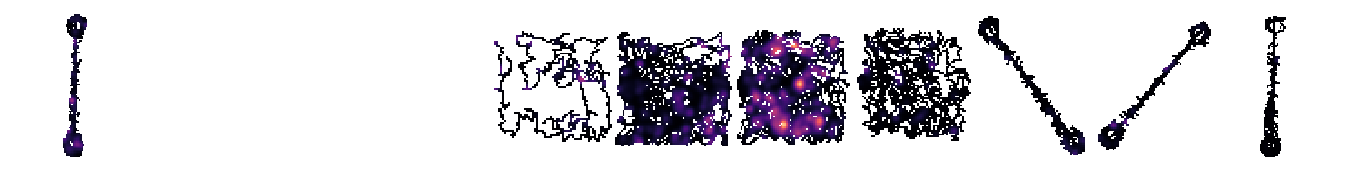

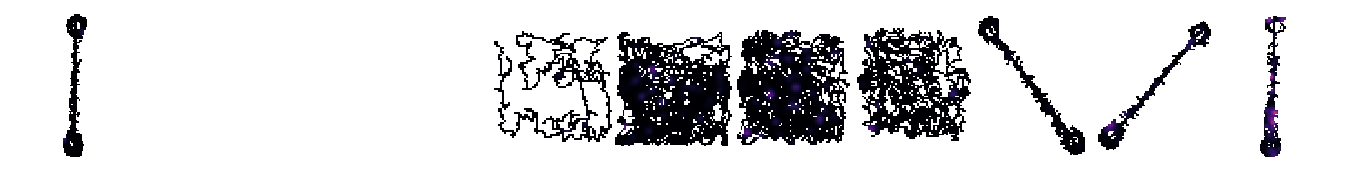

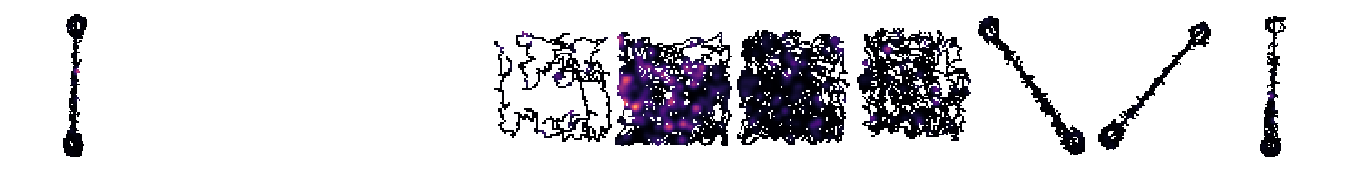

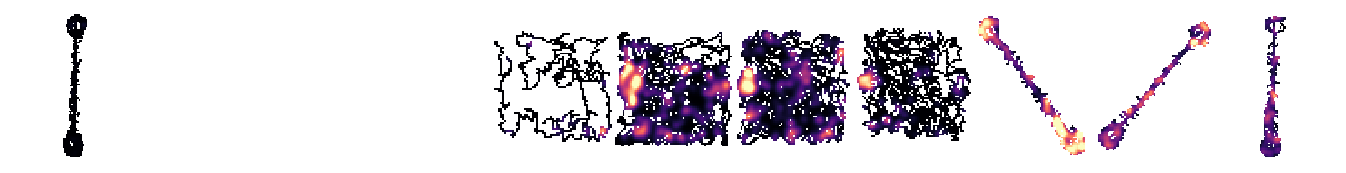

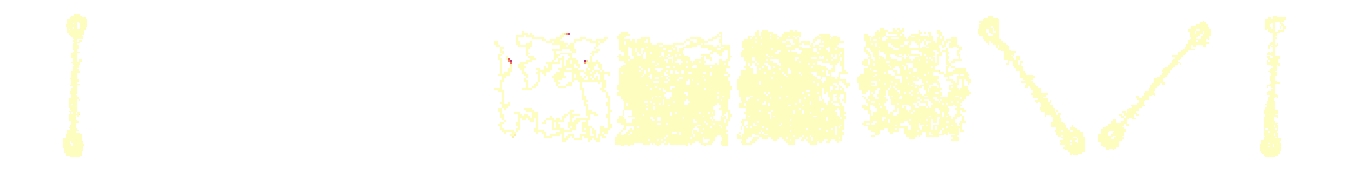

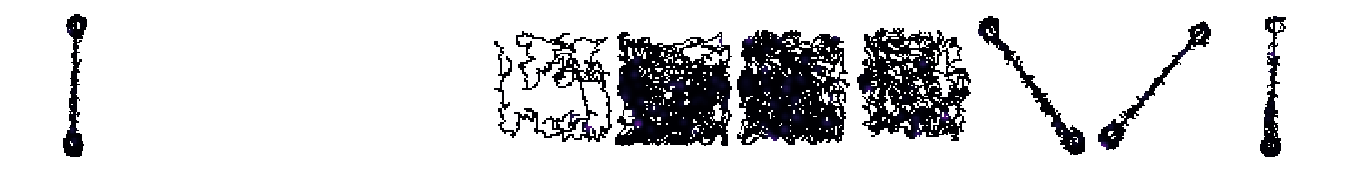

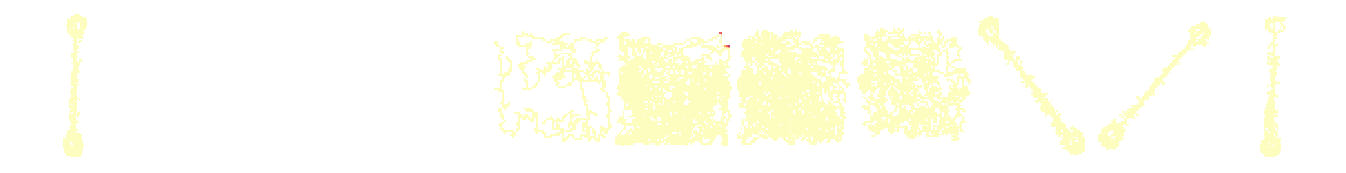

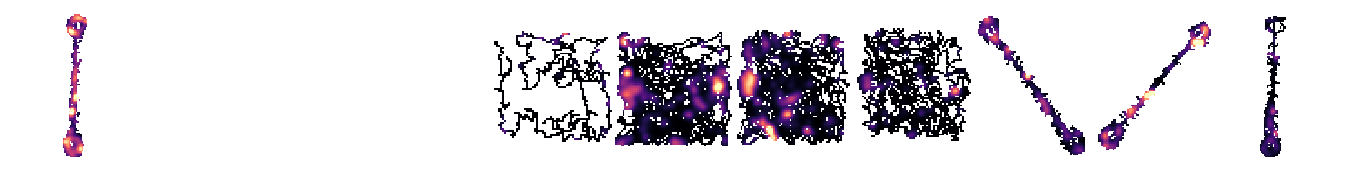

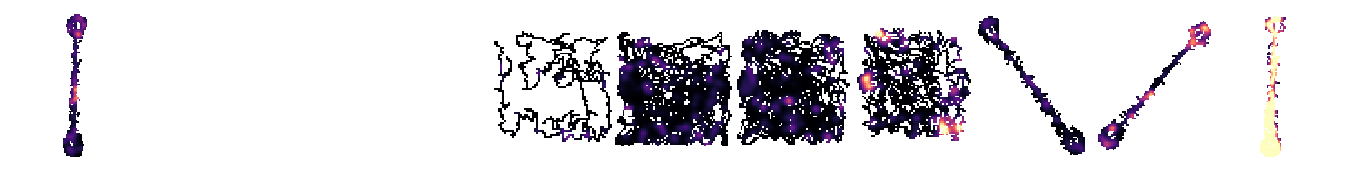

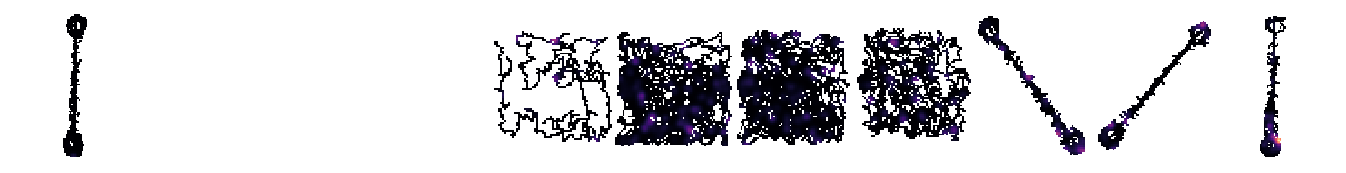

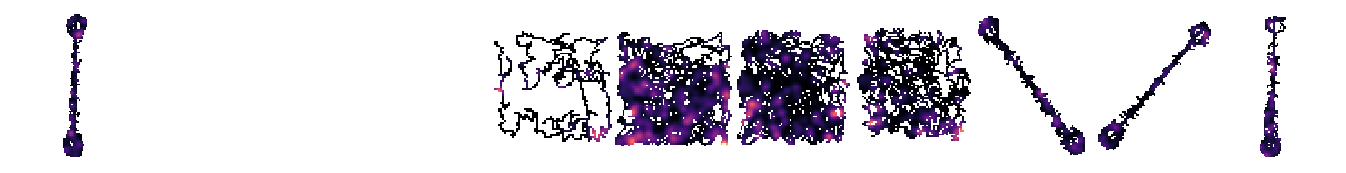

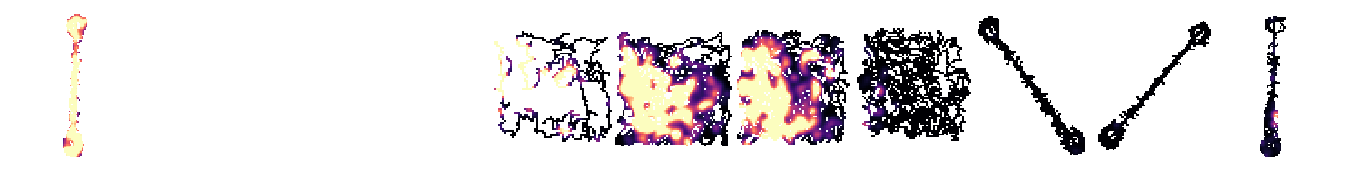

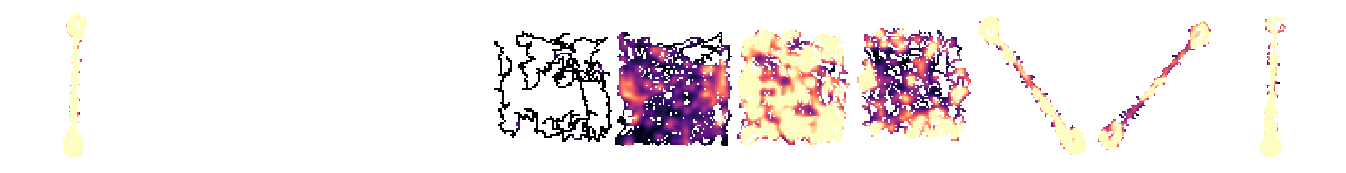

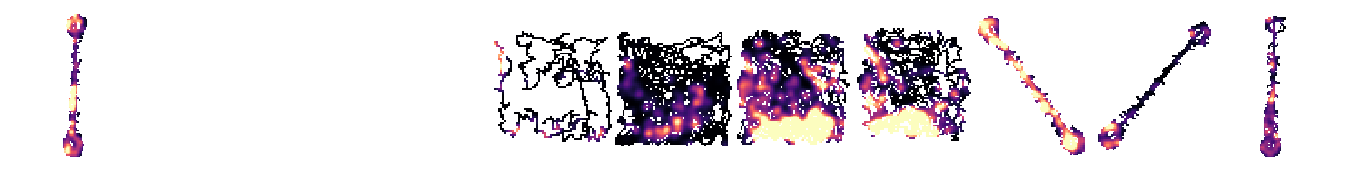

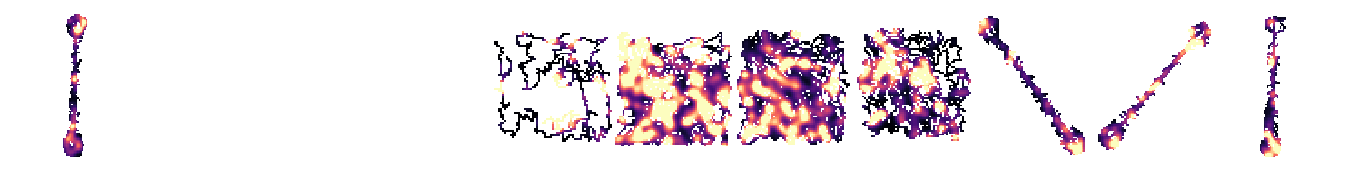

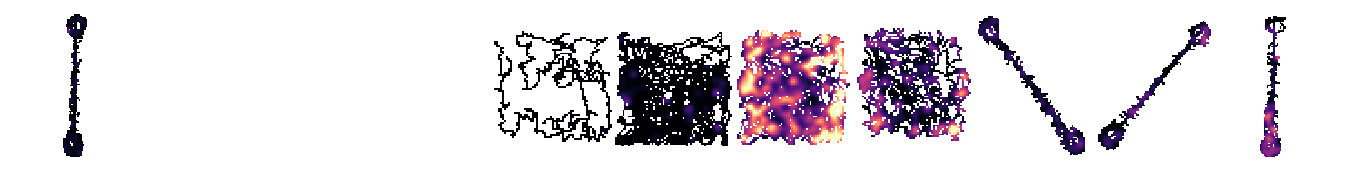

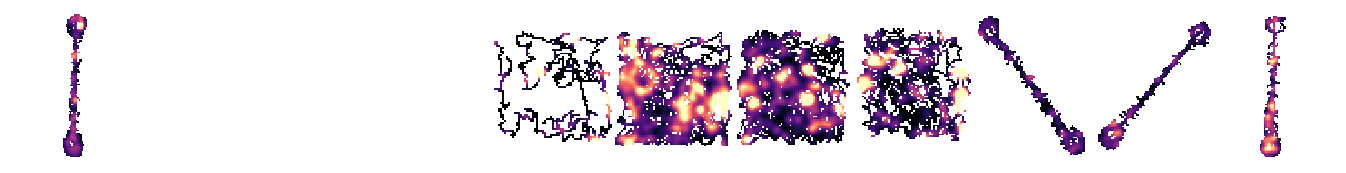

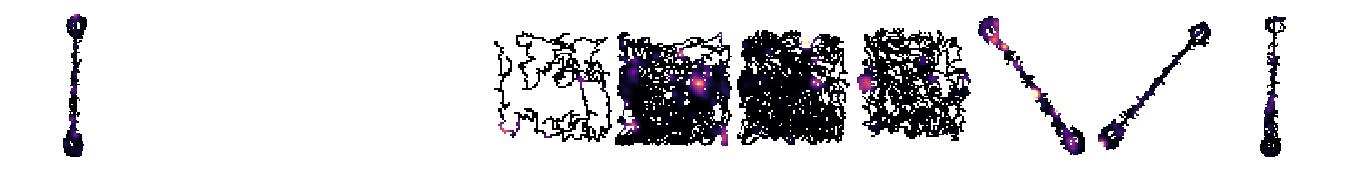

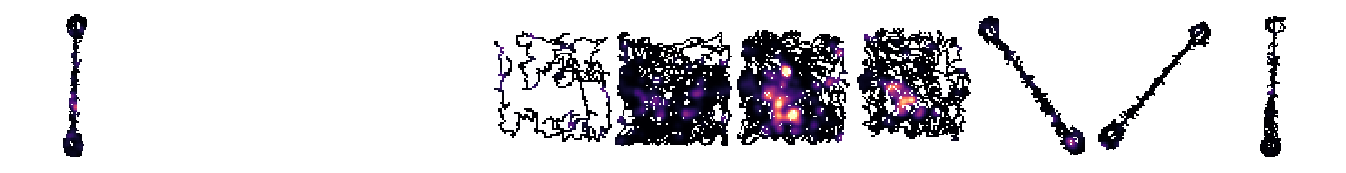

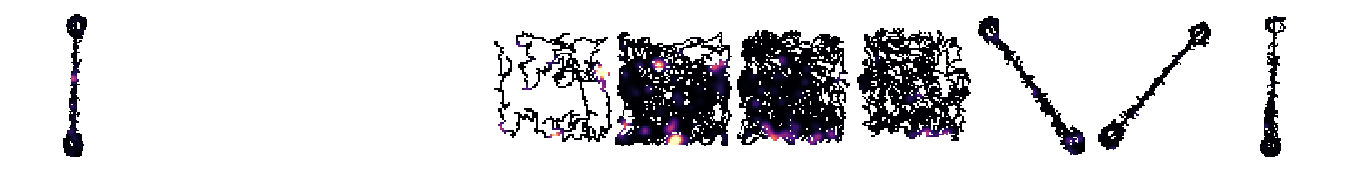

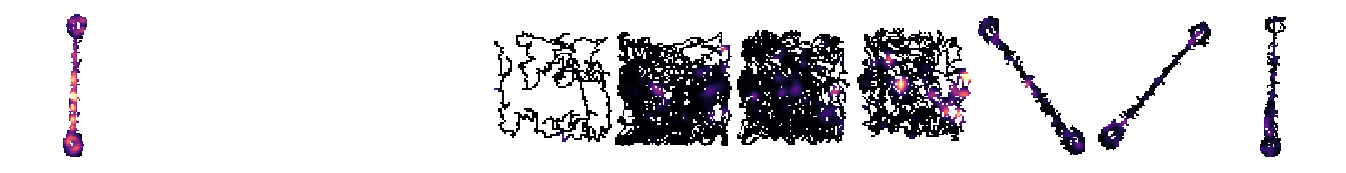

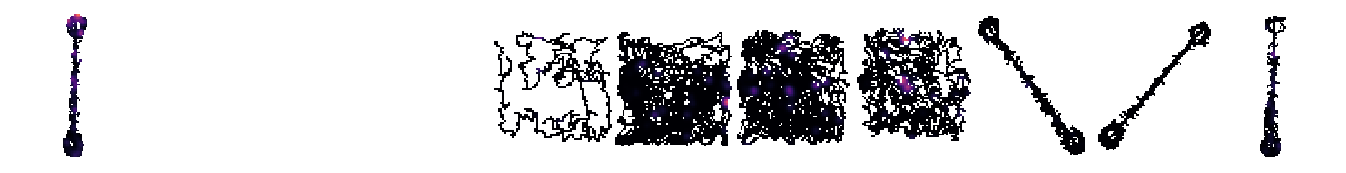

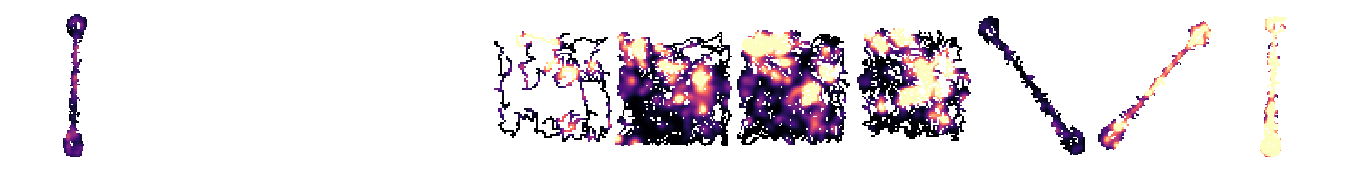

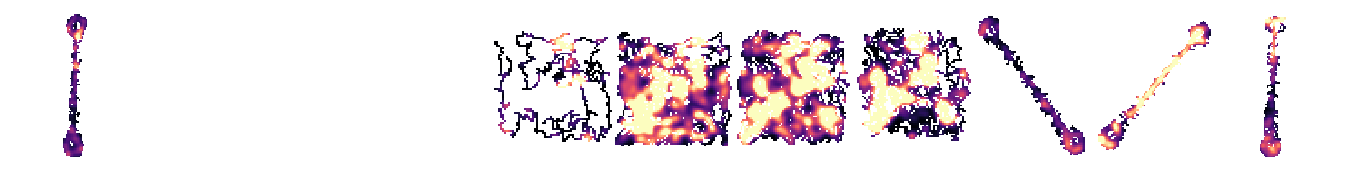

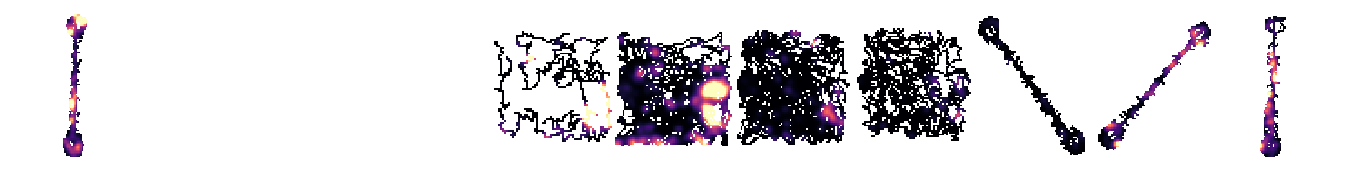

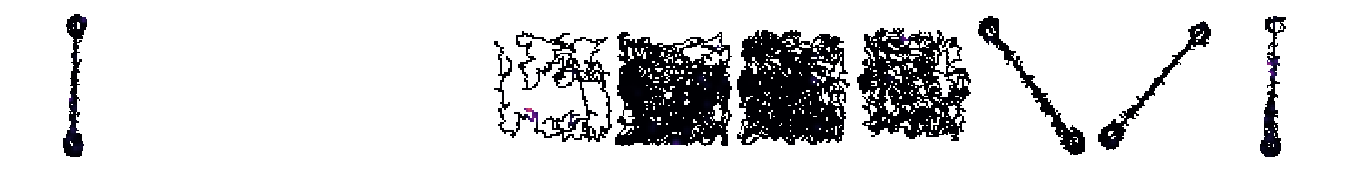

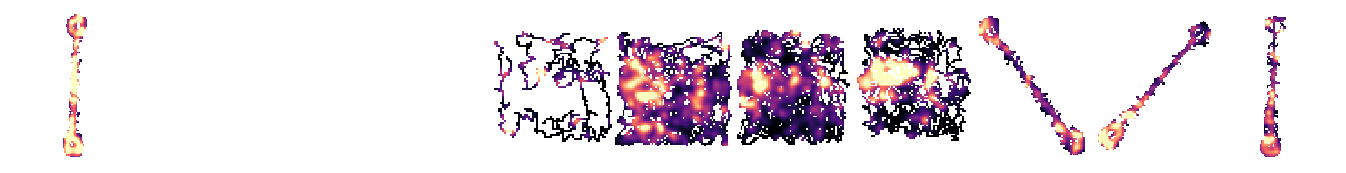

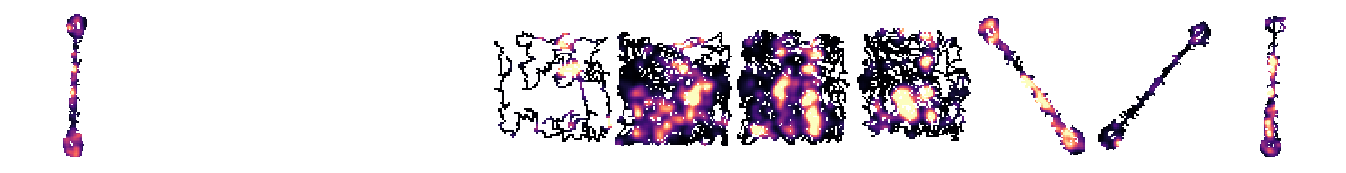

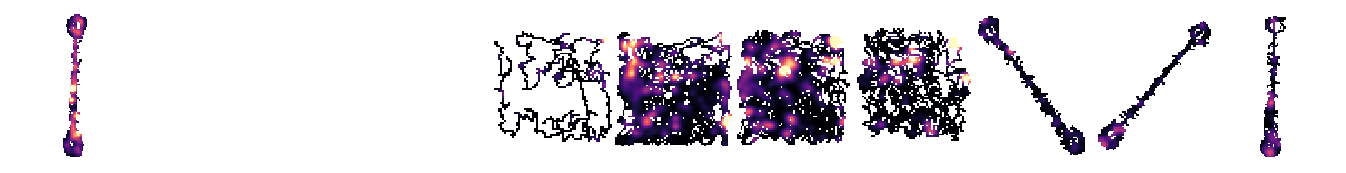

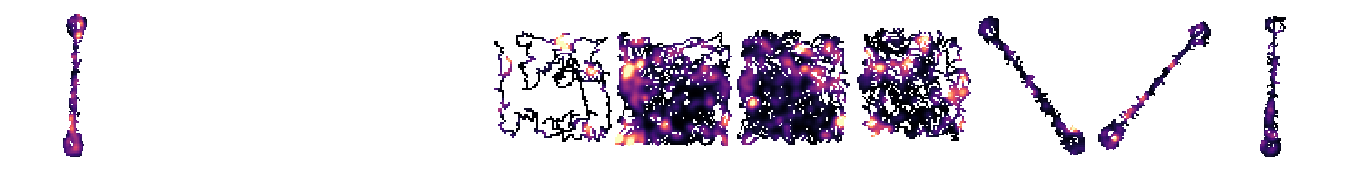

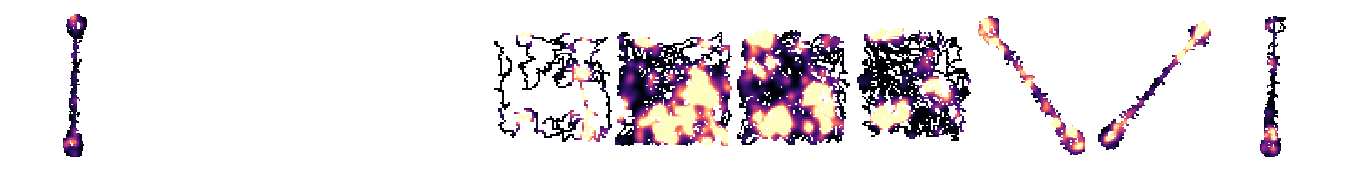

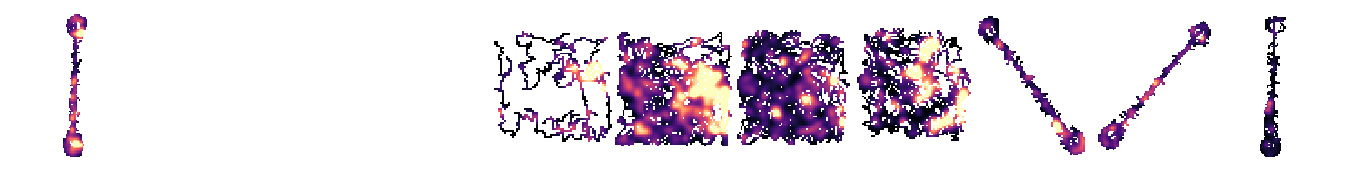

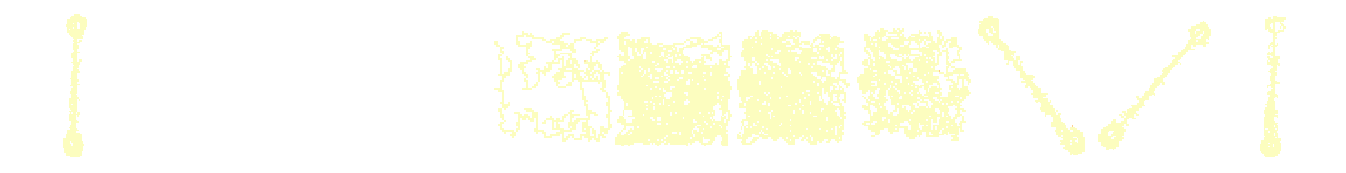

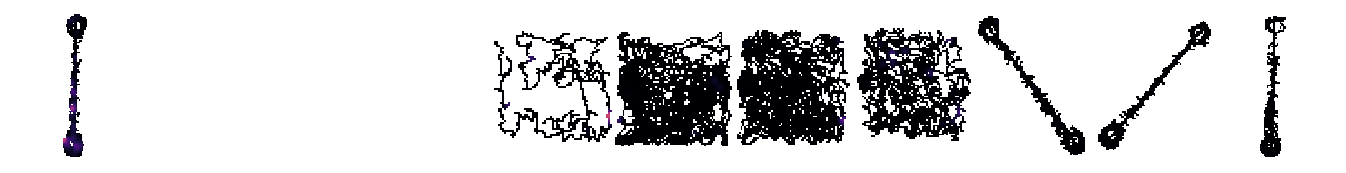

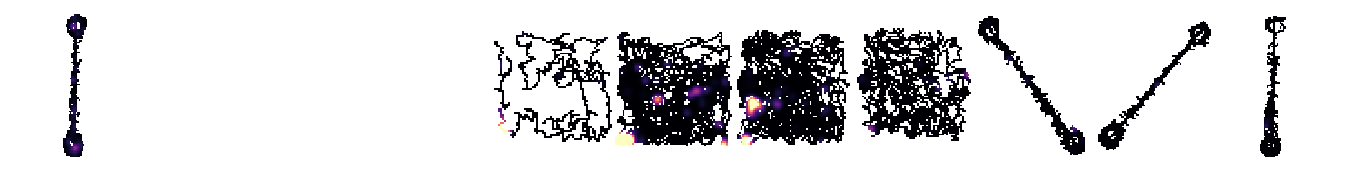

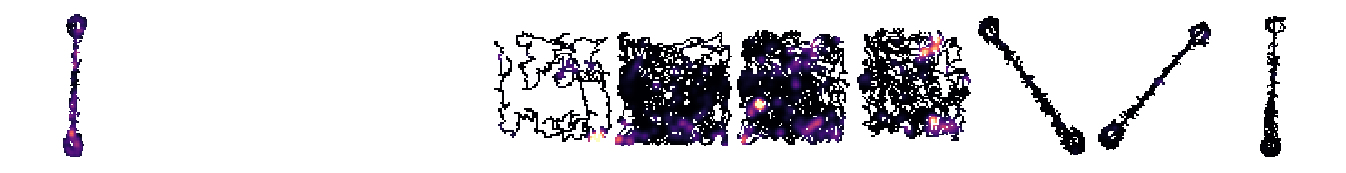

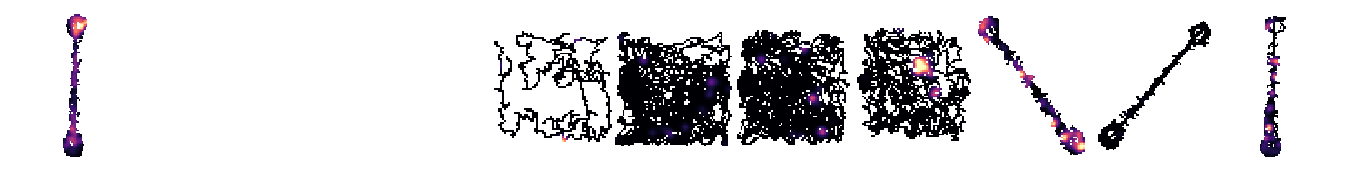

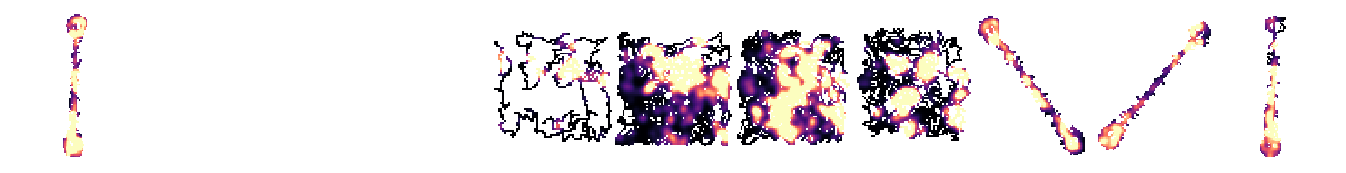

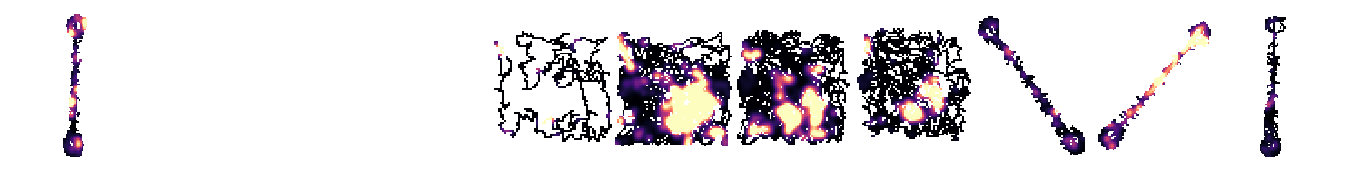

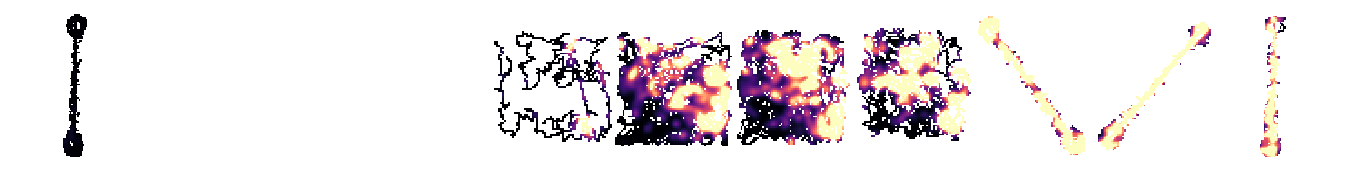

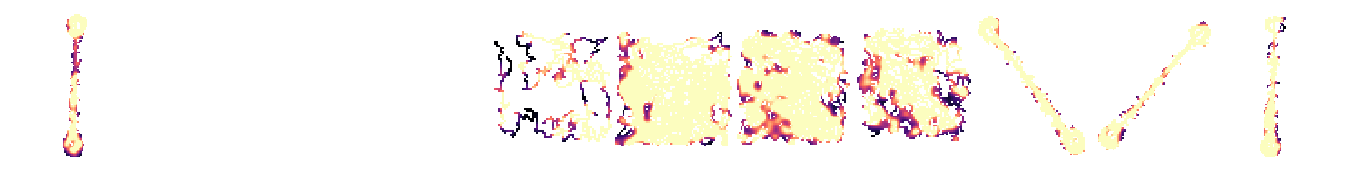

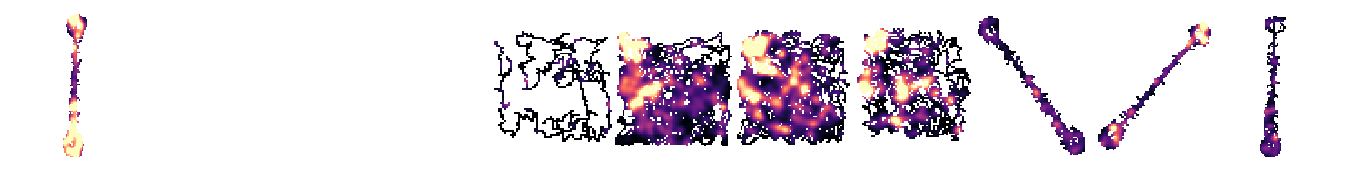

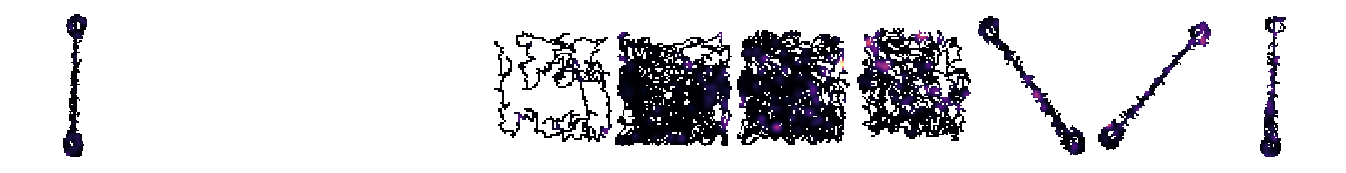

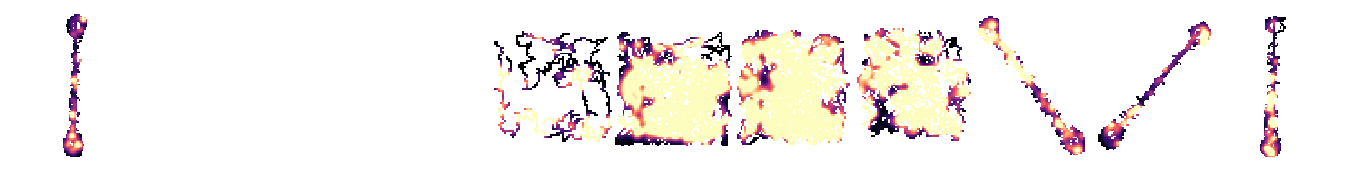

In [25]:
import logging
logging.getLogger().setLevel(logging.ERROR)

def plot_heatmaps(maps,cm,epoch_df,epochs,UID):
    index = epoch_df.query("environment != 'sleep'").index

    fig, axs = plt.subplots(1,len(index),figsize=functions.set_size("thesis", fraction=2, subplots=(2, len(index))),edgecolor=None)
    plt.subplots_adjust(wspace=0, hspace=0)

    uid_idx = np.where((cm.UID == UID).values)[0][0]
    for ind_i, ind in enumerate(index):
        try:
            tc = maps.SpatialMap(pos[epochs[ind]],st[epochs[ind]],dim=2,tuning_curve_sigma=5)
        except:
            axs[ind_i].axis("equal")
            axs[ind_i].axis("off")
            continue
        ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
        ratemap_[tc.tc.occupancy == 0] = np.nan
        sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[ind_i],vmin=0, vmax=2,rasterized=True)
        axs[ind_i].axis("equal")
        axs[ind_i].axis("off")
for uid in cm.UID:        
    plot_heatmaps(maps,cm,epoch_df,epochs,uid)
    plt.show()

In [13]:
cm.UID

1      2
13    14
16    17
17    18
19    20
20    21
33    34
34    35
36    37
37    38
38    39
45    46
46    47
47    48
48    49
49    50
52    53
53    54
54    55
56    57
62    63
63    64
66    67
67    68
68    69
69    70
70    71
71    72
74    75
75    76
76    77
77    78
79    80
80    81
82    83
83    84
84    85
85    86
87    88
90    91
91    92
92    93
93    94
95    96
Name: UID, dtype: uint8

In [ ]:
UID = 43
fig, axs = plt.subplots(1,4,figsize=functions.set_size("thesis", fraction=1.25, subplots=(1, 4)),edgecolor=None)
plt.subplots_adjust(wspace=-0.1, hspace=0)

uid_idx = np.where((cm.UID == UID).values)[0][0]

tc = maps.SpatialMap(pos[epochs[3]],st[epochs[3]],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[0],vmax=2,rasterized=True)
axs[0].axis("equal")
axs[0].axis("off")

tc = maps.SpatialMap(pos[epochs[7]],st[epochs[7]],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[1],vmax=5,rasterized=True)
axs[1].axis("equal")
axs[1].axis("off")

tc = maps.SpatialMap(pos[epochs[8]],st[epochs[8]],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[2],vmax=5,rasterized=True)
axs[2].axis("equal")
axs[2].axis("off")

tc = maps.SpatialMap(pos[epochs[9]][outbound_epochs],st[epochs[9]][outbound_epochs],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[3],vmax=2,rasterized=True)
axs[3].axis("equal")
axs[3].axis("off")

In [56]:
basepath = "Z:\Data\Kenji\ec013.779_791"

# get spikes
st,cm = loading.load_spikes(basepath)

# get position
position_df = loading.load_animal_behavior(basepath)
position_df_no_nan = position_df.query("not x.isnull() & not y.isnull()")
pos = nel.PositionArray(data=np.array([position_df_no_nan[["x","y"]]]).T,timestamps=position_df_no_nan.time.values)

x, _ = functions.linearize_position(pos[epochs[9]].data[0], pos[epochs[9]].data[1])
pos_linear = nel.PositionArray(data=x,timestamps=pos[epochs[9]].abscissa_vals)

(outbound_epochs, inbound_epochs) = functions.get_linear_track_lap_epochs(
    pos_linear.abscissa_vals, pos_linear.data[0], newLapThreshold=20
)
# load epochs
epoch_df = loading.load_epoch(basepath)
epochs = nel.EpochArray(np.array([epoch_df.startTime,epoch_df.stopTime]).T)

In [16]:
epoch_df

,name,startTime,stopTime,environment,behavioralParadigm
0,ec013.779_sleep,0.0000,454.2464,sleep,10
1,ec013.780_sleep,454.2464,3363.7464,sleep,10
2,ec013.781_sleep,3363.7464,3597.2184,sleep,10
3,ec013.782_Mwheel,3597.2184,7255.3564,Mwheel,10
4,ec013.783_sleep,7255.3564,8704.9564,sleep,10
5,ec013.784_sleep,8704.9564,11776.9564,sleep,10
6,ec013.785_sleep,11776.9564,12951.8564,sleep,10
7,ec013.786_bigSquare,12951.8564,15068.7564,bigSquare,10
8,ec013.787_bigSquare,15068.7564,16773.9214,bigSquare,10
9,ec013.788_linear,16773.9214,18246.8434,linear,10


In [ ]:
cm.putativeCellType

In [80]:
cm.query("brainRegion.str.contains('CA1') & putativeCellType.str.contains('Pyr')").UID.values

array([38, 39, 40, 43, 46, 51, 52, 53, 62, 65, 67, 69, 75, 76, 78],
      dtype=uint8)

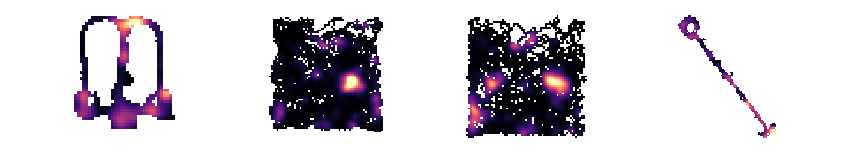

In [124]:
UID = 43
fig, axs = plt.subplots(1,4,figsize=functions.set_size("thesis", fraction=1.25, subplots=(1, 4)),edgecolor=None)
plt.subplots_adjust(wspace=-0.1, hspace=0)

uid_idx = np.where((cm.UID == UID).values)[0][0]

tc = maps.SpatialMap(pos[epochs[3]],st[epochs[3]],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[0],vmax=2,rasterized=True)
axs[0].axis("equal")
axs[0].axis("off")

tc = maps.SpatialMap(pos[epochs[7]],st[epochs[7]],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[1],vmax=5,rasterized=True)
axs[1].axis("equal")
axs[1].axis("off")

tc = maps.SpatialMap(pos[epochs[8]],st[epochs[8]],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[2],vmax=5,rasterized=True)
axs[2].axis("equal")
axs[2].axis("off")

tc = maps.SpatialMap(pos[epochs[9]][outbound_epochs],st[epochs[9]][outbound_epochs],dim=2,tuning_curve_sigma=5)
ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
ratemap_[tc.tc.occupancy == 0] = np.nan
sns.heatmap(ratemap_,cmap="magma",cbar=False,ax=axs[3],vmax=2,rasterized=True)
axs[3].axis("equal")
axs[3].axis("off")

# sns.despine()
# tc = maps.SpatialMap(pos_linear,st[epochs[9]],dim=1,dir_epoch=inbound_epochs,tuning_curve_sigma=10)
# ratemap_ = tc.tc.ratemap[uid_idx,:].copy()
# ratemap_[tc.tc.occupancy == 0] = np.nan
# axs[3].plot(ratemap_)

plt.savefig(
    os.path.join(fig_save_path, "place_cell_example_kenji.svg"),
    dpi=600,
    bbox_inches="tight",
)

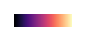

In [135]:
a = np.array([[0,1]])
plt.figure(figsize=(.5, .15))
img = plt.imshow(a, cmap="magma")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.axis("off")
plt.savefig(os.path.join(fig_save_path,"magma_colorbar.svg"))

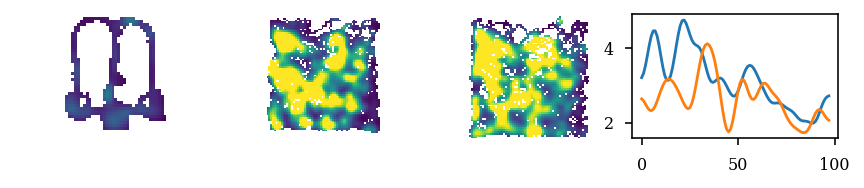

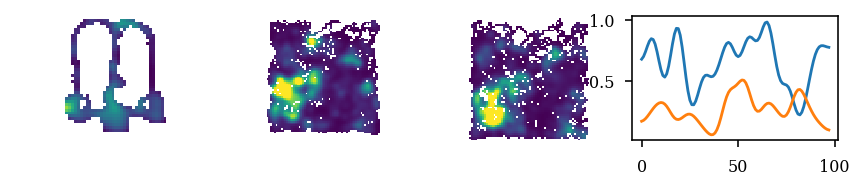

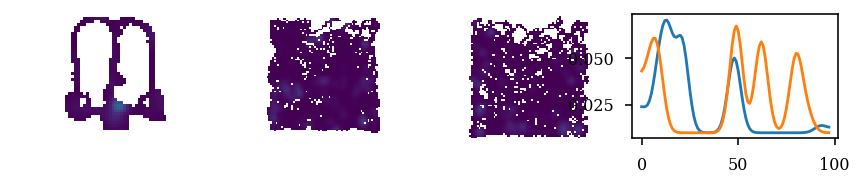

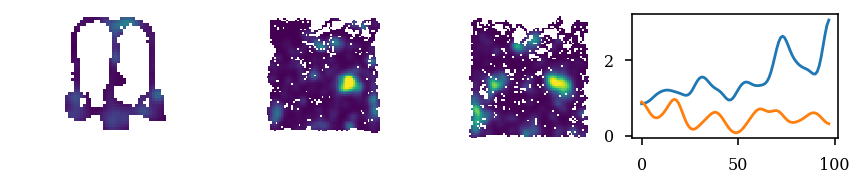

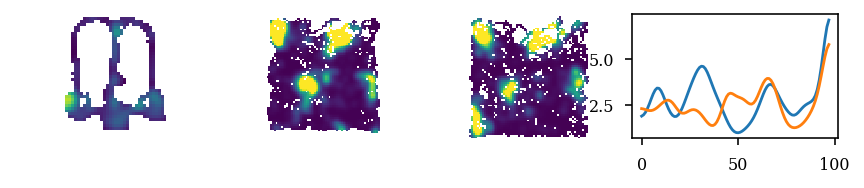

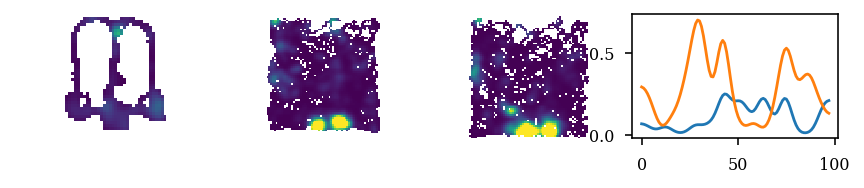

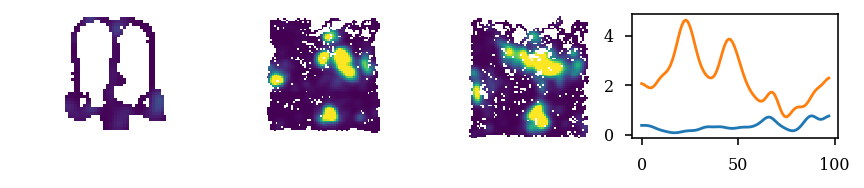

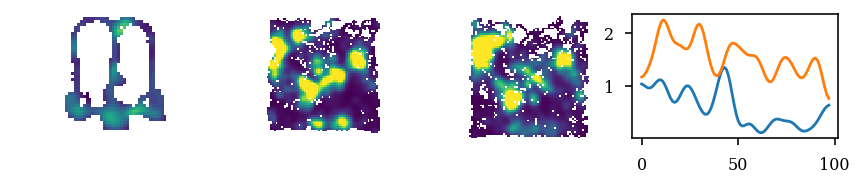

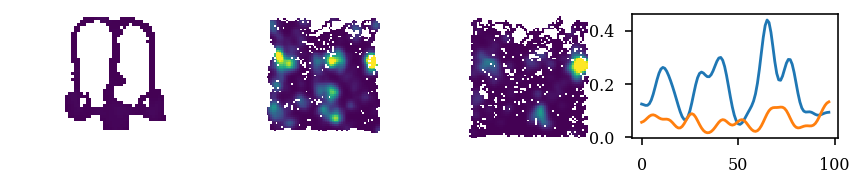

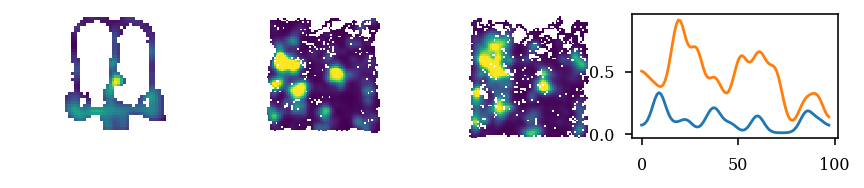

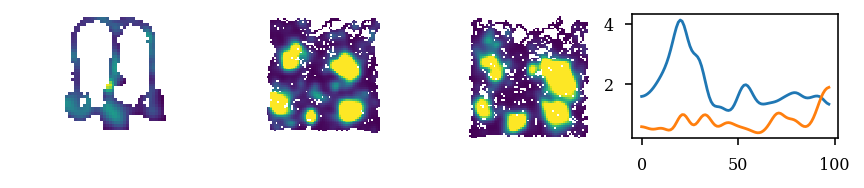

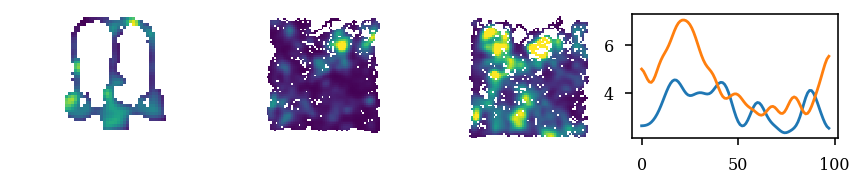

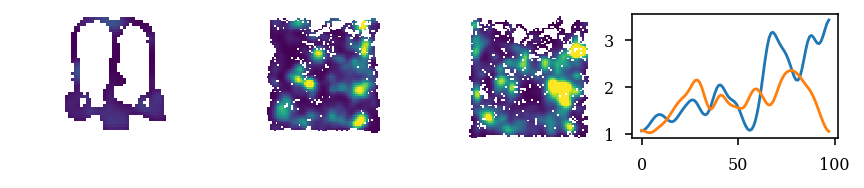

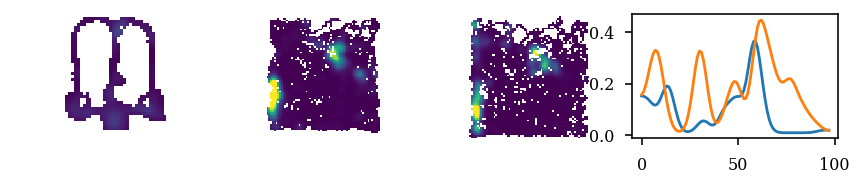

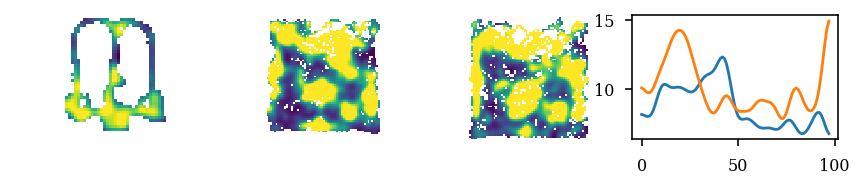

In [97]:
import logging

logging.getLogger().setLevel(logging.ERROR)

# UID = 43.0
# UID = 46 # grid cell 
# UID = 51 # maybe
for UID in cm.query("brainRegion.str.contains('CA1') & putativeCellType.str.contains('Pyr')").UID.values:
    fig, axs = plt.subplots(1,4,figsize=functions.set_size("thesis", fraction=1.25, subplots=(1, 4)),edgecolor=None)
    plt.subplots_adjust(wspace=0, hspace=0)

    uid_idx = np.where((cm.UID == UID).values)[0][0]

    tc = maps.SpatialMap(pos[epochs[3]],st[epochs[3]],dim=2,tuning_curve_sigma=5)
    ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
    ratemap_[tc.tc.occupancy == 0] = np.nan
    sns.heatmap(ratemap_,cmap="viridis",cbar=False,ax=axs[0],vmax=5)
    axs[0].axis("equal")
    axs[0].axis("off")

    tc = maps.SpatialMap(pos[epochs[7]],st[epochs[7]],dim=2,tuning_curve_sigma=5)
    ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
    ratemap_[tc.tc.occupancy == 0] = np.nan
    sns.heatmap(ratemap_,cmap="viridis",cbar=False,ax=axs[1],vmax=5)
    axs[1].axis("equal")
    axs[1].axis("off")

    tc = maps.SpatialMap(pos[epochs[8]],st[epochs[8]],dim=2,tuning_curve_sigma=5)
    ratemap_ = tc.tc.ratemap[uid_idx,:,:].copy()
    ratemap_[tc.tc.occupancy == 0] = np.nan
    sns.heatmap(ratemap_,cmap="viridis",cbar=False,ax=axs[2],vmax=5)
    axs[2].axis("equal")
    axs[2].axis("off")

    tc = maps.SpatialMap(pos_linear,st[epochs[9]],dim=1,dir_epoch=outbound_epochs,tuning_curve_sigma=10)
    ratemap_ = tc.tc.ratemap[uid_idx,:].copy()
    ratemap_[tc.tc.occupancy == 0] = np.nan
    axs[3].plot(ratemap_)

    tc = maps.SpatialMap(pos_linear,st[epochs[9]],dim=1,dir_epoch=inbound_epochs,tuning_curve_sigma=10)
    ratemap_ = tc.tc.ratemap[uid_idx,:].copy()
    ratemap_[tc.tc.occupancy == 0] = np.nan
    axs[3].plot(ratemap_)
    plt.show()

In [ ]:

UID = 43.0
# plot_place_cells(basepath, UID, save_path)
save_file = os.path.join(
    place_save_path, basepath.replace(os.sep, "_").replace(":", "_") + str(UID) + ".svg"
)
plt.savefig(save_file, dpi=300, bbox_inches="tight")